In [1]:
# ANTIDOX ; the purpose of this app / model is to make sure that social media is a safe space .
# This is done by the algorithm going through the comment using X comments . the algorithm detects signs of poor mental health by analyzing the comments and categorizing whether a comment will show either Negative , Positove , Neutral
# This will help with detecting whether someone has a issue with their mental health , the owner of the account to be ABLE TO FILTER THE COMMENTS .
# For this we will use Natural Language Processing (NLP) . This is where by the computer analyzes the sentences and is able to comprehend .

### VIBE LENZZ
#### - the purpose of this app / model is to analyze comments , reviews , opinions people , customers , social media users leave on videos , review platforms , socila media. This helsp us know what maount of positive , negative or neutral comments are there . In reurn companies can you this data to improve their product , understand the customers feelings and opinions towards the product . 
#### - This is done by the algorithm going through the comment using X comments . the algorithm detects signs of poor mental health by analyzing the comments and categorizing whether a comment will show either; Negative , Positive , Neutral
#### - This will help with detecting whether someone has a issue with their mental health , the owner of the account to be ABLE TO FILTER THE COMMENTS .
#### - For this we will use Natural Language Processing (NLP) . This is where by the computer analyzes the sentences and is able to comprehend .

In [2]:
#First i want to import the necessary libraries to create the model .
import pandas as pd
import numpy as np



In [3]:
# we then upload the necessary documents that will be used as a data source
# Assuming the CSV files do not have a header row and the columns are: ID, Topic, Sentiment, Text
train = pd.read_csv("twitter_training.csv", header=None, names=['ID', 'Topic', 'Sentiment', 'Text'])
train
# this is the data that will be used to create and train the model

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
# But before all that we have to clean the data to ensure there are no duplicates or even null values
""" first lets sort out the data """
train.isna().sum()
train = train.dropna()
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
# Now we check for duplicates and remove them
train.duplicated().sum()
train = train.drop_duplicates()

In [6]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
# We can now focus on the removing unecessary columns that wont be of help to us
# Assuming the first column, 'ID', is the one to be dropped.
train.drop(columns='ID', inplace = True)
train

C:\Users\Admin\AppData\Local\Temp\ipykernel_24788\1892456486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns='ID', inplace = True)


,Topic,Sentiment,Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


### TEXT CLEANING AND DATA CLEANING 
##### Here we are to clean the texts and remove unneccessary noise in the texts . 

In [8]:
# We are now done with data cleaning now its time to normalize the text , this will help the computer understand the text being fed
# We do this by removing emojis , hashtags , usernames , etc
import re
import pandas as pd
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('punkt')
""" now that the necessary modules and libraries have been installed lets try and make these statements structured """


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


' now that the necessary modules and libraries have been installed lets try and make these statements structured '

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

#Next we initialize stopwords and sentiment analyzer
stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

# Define a function to clean text
def clean_text(text) :
  #Remove URLs
  text = re.sub(r'http\S+|www.\S+', '', text)
  # we can start by removing mentions
  text = re.sub(r'@\w+', '', text)
  # Remove the hashtags but keep the word
  text = re.sub(r'#(\w+)', r'\1', text)
  #Remove emojis
  text = emoji.replace_emoji(text , replace = '')
  # Remvoe special characters
  text = re.sub(r'[^A-Za-z\s]', '', text)
  # Remove extra spaces
  text = re.sub(r'\s+', ' ', text).strip()
  return text

# Define fuction to remove stopwords and tokenize
def preprocess_text(text):
  cleaned = clean_text(text)
  words = word_tokenize(cleaned)
  filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
  return filtered_words

# Define a function for sentiment analysis
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        sentiment = "Positive"
    elif compound <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return sentiment, score
# Test with sample comments
comments = [
    "I love this product! 😍 Check it out at https://example.com @user #amazing",
    "This is terrible, I hate it! 😡",
    "The product is okay, nothing special.",
    "Wow! I’m so happy with the service!! #happy #customer"
]

for comment in comments:
    tokens = preprocess_text(comment)
    sentiment, scores = analyze_sentiment(comment)
    print(f"Original Comment: {comment}")
    print(f"Tokens: {tokens}")
    print(f"Sentiment: {sentiment}")
    print(f"Scores: {scores}\n")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


Original Comment: I love this product! 😍 Check it out at https://example.com @user #amazing
Tokens: ['love', 'product', 'check', 'amazing']
Sentiment: Positive
Scores: {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6696}

Original Comment: This is terrible, I hate it! 😡
Tokens: ['terrible', 'hate']
Sentiment: Negative
Scores: {'neg': 0.703, 'neu': 0.297, 'pos': 0.0, 'compound': -0.7959}

Original Comment: The product is okay, nothing special.
Tokens: ['product', 'okay', 'nothing', 'special']
Sentiment: Negative
Scores: {'neg': 0.277, 'neu': 0.49, 'pos': 0.233, 'compound': -0.092}

Original Comment: Wow! I’m so happy with the service!! #happy #customer
Tokens: ['wow', 'im', 'happy', 'service', 'happy', 'customer']
Sentiment: Positive
Scores: {'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'compound': 0.8648}



[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
train

,Topic,Sentiment,Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


### Next we check for class imbalance to ensure that there is proper balance to ensure that there is class balance between the sentiments

In [11]:
#First lets define the target variable which is sentiment 
train['Sentiment'].head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: Sentiment, dtype: object

In [12]:
train['Sentiment'].value_counts()

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [13]:
# Now lets make sure the percentages 
train['Sentiment'].value_counts(normalize=True) * 100

Sentiment
Negative      30.280786
Positive      27.510606
Neutral       24.712515
Irrelevant    17.496092
Name: proportion, dtype: float64

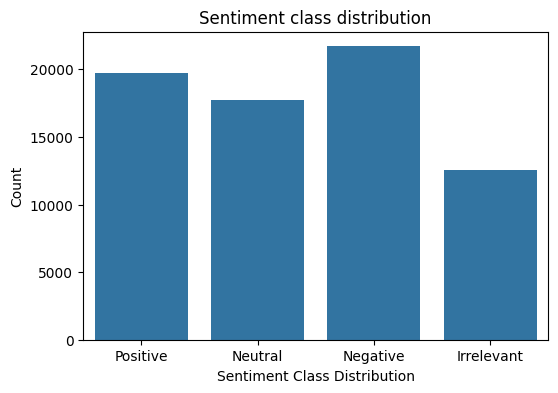

In [14]:
# Lets visualize class imbalance 
import matplotlib.pyplot as plt
import seaborn as sns  
plt.figure(figsize=(6,4))
sns.countplot(x=train['Sentiment'])
plt.title("Sentiment class distribution")
plt.xlabel("Sentiment Class Distribution")
plt.ylabel("Count")
plt.show()

In [15]:
# Now lets see whether the class imbalance ration to see whether its high , mild or serve 
counts = train['Sentiment'].value_counts()
major = counts.max()
minor = counts.min()
imbalance_ratio = major / minor

print("Imbalance Ratio:", imbalance_ratio)


Imbalance Ratio: 1.7307170774507459


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')


In [17]:
from sklearn.model_selection import train_test_split
X = train['Text']
y = train['Sentiment']
X

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: Text, Length: 71656, dtype: object

In [18]:
y 

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74677    Positive
74678    Positive
74679    Positive
74680    Positive
74681    Positive
Name: Sentiment, Length: 71656, dtype: object

#### We then stratify thr classes , this ensures that the classes are well balanced 

In [19]:
# We now split the data 
from sklearn.model_selection import train_test_split
X_train , y_train , X_test , y_test = train_test_split(X , y , test_size=0.2 , stratify =y )

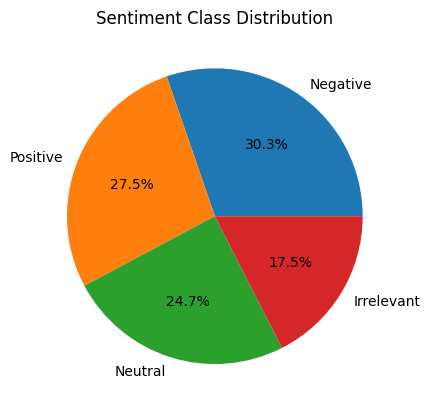

In [20]:
train['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title("Sentiment Class Distribution")
plt.ylabel("")  # hides text
plt.show()

In [21]:
# Now we can perform feature extraction using Term Frequency inverse Documetn Frequency
# This technique ensures thta there is emphasis on important words and redcues weight for commomn words
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure 'clean_text' column exists before vectorization
# This line is added here to handle cases where the dataframe might have been reset
# or the cleaning cell was not executed immediately before this one.
train['clean_text'] = train['Text'].fillna('').apply(clean_text)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train['clean_text'])
print(vectorizer.get_feature_names_out())
print("TF-IDF matrix shape:", X.shape)


C:\Users\Admin\AppData\Local\Temp\ipykernel_24788\1111949970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['clean_text'] = train['Text'].fillna('').apply(clean_text)


['aa' 'aaa' 'aaaaaaaaaaaa' ... 'zzmhpax' 'zzvfsrhewg' 'zzz']
TF-IDF matrix shape: (71656, 37340)


#### The clean text column contains a new column of fresh text that have already been cleaned after tokenization 

In [22]:
train

,Topic,Sentiment,Text,clean_text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...
...,...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...,Just realized between the windows partition of...


Before balancing:
Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


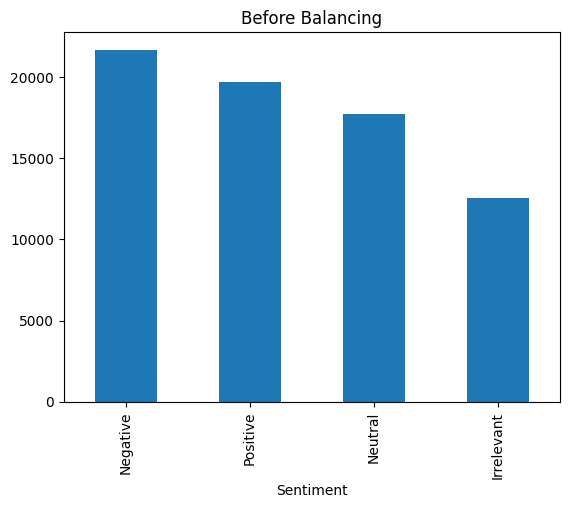

After balancing:
Sentiment
Positive      21698
Neutral       21698
Negative      21698
Irrelevant    21698
Name: count, dtype: int64


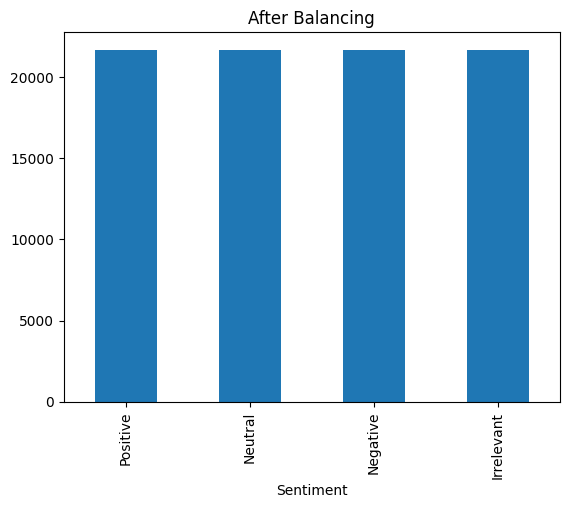

In [23]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import matplotlib.pyplot as plt

X = train['clean_text']
y = train['Sentiment']

# BEFORE
print("Before balancing:")
print(y.value_counts())

y.value_counts().plot(kind='bar', title='Before Balancing')
plt.show()

# Oversample (raw text)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X.to_frame(), y)

# AFTER
print("After balancing:")
print(pd.Series(y_res).value_counts())

pd.Series(y_res).value_counts().plot(kind='bar', title='After Balancing')
plt.show()


### Now we do vectorization and start training the model . this happens after splitting and cleaning the data / texts which we have already done . 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)


In [26]:
# IMPORT LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. SPLIT THE DATA
X_train, X_test, y_train, y_test = train_test_split(
    X,                      # your vectorized or text features
    y,                      # your target labels
    test_size=0.2,
    random_state=42,
    stratify=y              # keeps class balance the same in both sets
)

# 2. DEFINE THE MODEL
log_reg = LogisticRegression(
    max_iter=300,           # prevents convergence warnings
    class_weight='balanced' # handles class imbalance properly
)

# 3. FIT THE MODEL ON TRAINING DATA
log_reg.fit(X_train_vec, y_train)

# 4. MAKE PREDICTIONS
y_pred = log_reg.predict(X_test_vec)

# 5. PRINT PREDICTIONS
print(y_pred)



['Irrelevant' 'Neutral' 'Neutral' ... 'Neutral' 'Neutral' 'Negative']


### Evaluation of the model 


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.664178063075635


In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.56      0.65      0.60      2507
    Negative       0.74      0.72      0.73      4340
     Neutral       0.63      0.61      0.62      3542
    Positive       0.70      0.66      0.68      3943

    accuracy                           0.66     14332
   macro avg       0.66      0.66      0.66     14332
weighted avg       0.67      0.66      0.67     14332



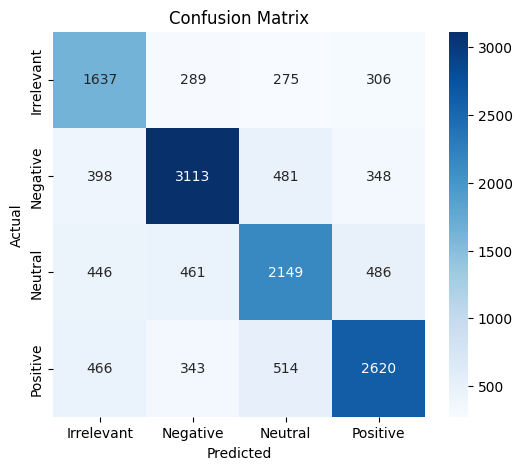

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg.classes_, 
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Overall Summary and Interpretation
Best Performance (Highest Accuracy): The model is most accurate at identifying the Negative class (3,113 correct predictions).

Most Confused Class (Hardest to Predict): The model struggles most with the Neutral class, where a high percentage of the actual Neutral items are mislabeled as Positive or Negative.

Major Error: The most common significant error is confusing Neutral with Positive (486) or Negative (461). This suggests the items labeled "Neutral" might contain subtle sentiment cues that confuse the model, pushing it toward a strong positive or negative prediction.

In simple terms, the model is pretty good at spotting truly negative content, but it has a hard time figuring out what is truly neutral, often thinking neutral items are either positive or negative.

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# ---------------------------
# 1. Naive Bayes
# ---------------------------
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("----------------------------------------")
print("Naive Bayes Accuracy:", accuracy_nb)

# ---------------------------
# 2. Linear SVM
# ---------------------------
svm_model = LinearSVC(class_weight='balanced', max_iter=3000)
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("----------------------------------------")
print("Linear SVM Accuracy:", accuracy_svm)



----------------------------------------
Naive Bayes Accuracy: 0.6090566564331565
----------------------------------------
Linear SVM Accuracy: 0.67883058889199


#### Now i want to see whether the accuracy will improve my model accuracy

In [31]:
# Assuming 'filtered_df' contains only Positive and Negative

train = train[train['Sentiment'].isin(['Positive', 'Negative'])]

X = train['clean_text']      
y = train['Sentiment']      


Logistic Regression Accuracy: 0.8777013159483279
              precision    recall  f1-score   support

    Negative       0.88      0.89      0.88      4340
    Positive       0.88      0.86      0.87      3943

    accuracy                           0.88      8283
   macro avg       0.88      0.88      0.88      8283
weighted avg       0.88      0.88      0.88      8283



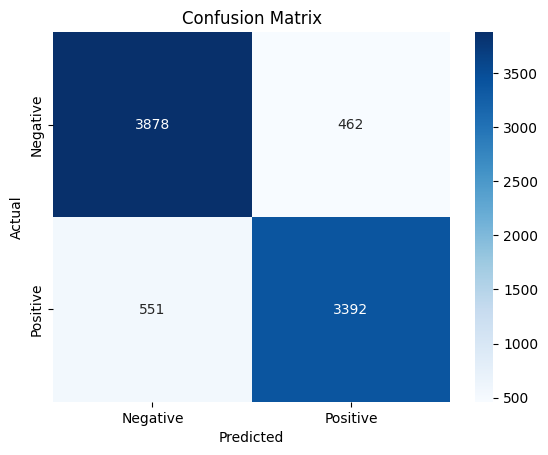

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Since dataset is almost balanced, class_weight is optional
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train_vec, y_train)

# Predictions
y_pred = log_reg.predict(X_test_vec)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




Logistic Regression Performance:
              precision    recall  f1-score   support

    Negative       0.88      0.89      0.88      4340
    Positive       0.88      0.86      0.87      3943

    accuracy                           0.88      8283
   macro avg       0.88      0.88      0.88      8283
weighted avg       0.88      0.88      0.88      8283



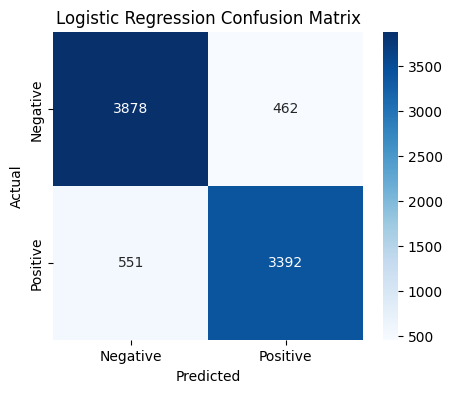


Naive Bayes Performance:
              precision    recall  f1-score   support

    Negative       0.86      0.92      0.89      4340
    Positive       0.91      0.83      0.87      3943

    accuracy                           0.88      8283
   macro avg       0.88      0.88      0.88      8283
weighted avg       0.88      0.88      0.88      8283



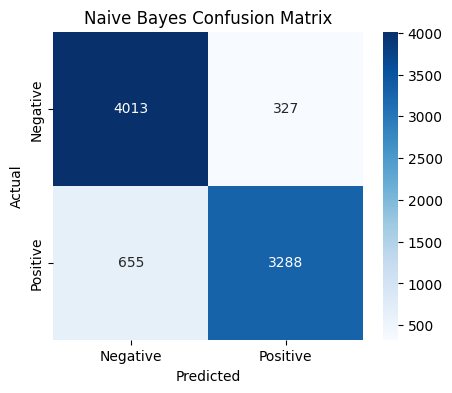


Linear SVM Performance:
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.92      4340
    Positive       0.92      0.92      0.92      3943

    accuracy                           0.92      8283
   macro avg       0.92      0.92      0.92      8283
weighted avg       0.92      0.92      0.92      8283



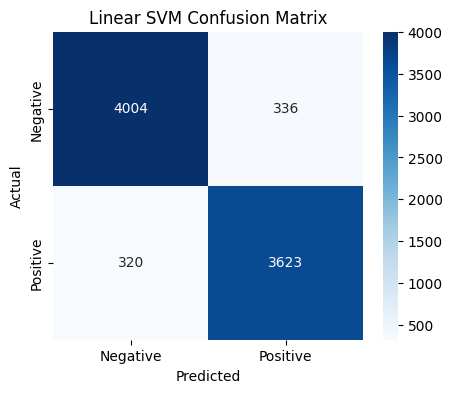


Model Accuracy Comparison:
Logistic Regression: 0.8777
Naive Bayes: 0.8814
Linear SVM: 0.9208


In [33]:
# ------------------------------
# IMPORT LIBRARIES
# ------------------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# 1. SPLIT DATA
# ------------------------------
X = train['clean_text']   # text
y = train['Sentiment']    # labels: Positive / Negative

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# 2. VECTORIZE TEXT
# ------------------------------
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ------------------------------
# 3. DEFINE MODELS
# ------------------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=300),
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(max_iter=3000)
}

# ------------------------------
# 4. TRAIN, PREDICT, EVALUATE
# ------------------------------
results = {}

for name, model in models.items():
    # Train
    model.fit(X_train_vec, y_train)
    
    # Predict
    y_pred = model.predict(X_test_vec)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Classification Report
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    
    # Store accuracy for comparison
    results[name] = acc
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ------------------------------
# 5. COMPARE ACCURACIES
# ------------------------------
print("\nModel Accuracy Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Accuracy: 0.9208016419171797

Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.92      0.92      4340
    Positive       0.92      0.92      0.92      3943

    accuracy                           0.92      8283
   macro avg       0.92      0.92      0.92      8283
weighted avg       0.92      0.92      0.92      8283



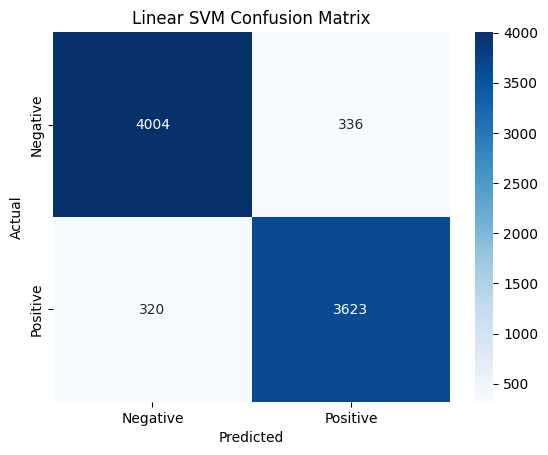

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Split the data
X = train['clean_text']
y = train['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 3. Define Linear SVM
svm_model = LinearSVC(max_iter=3000)

# 4. Train the model
svm_model.fit(X_train_vec, y_train)

# 5. Make predictions
y_pred = svm_model.predict(X_test_vec)

# 6. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Linear SVM Confusion Matrix")
plt.show()


Top 20 words for Positive sentiment:
                word  coefficient
10987        moments     2.986347
5065           eager     2.869739
3352   condescending     2.635606
19962          xbots     2.614309
10107           love     2.609263
4799            dope     2.598554
3368      confidence     2.509093
5634        exciting     2.499790
1566            best     2.490951
5630         excited     2.477145
19690        willing     2.470253
8880          island     2.405581
12085        optimum     2.341096
5394        enjoying     2.330796
10123         loving     2.295362
17508     terminator     2.294942
19346        wanting     2.294137
7301        greatest     2.228205
18613          unban     2.213706
6650             fun     2.202235

Top 20 words for Negative sentiment:
               word  coefficient
6212            fix    -3.476654
13613        powder    -2.892838
3444     constantly    -2.891748
648         annoyed    -2.773448
19864         worst    -2.693382
4539   disapp

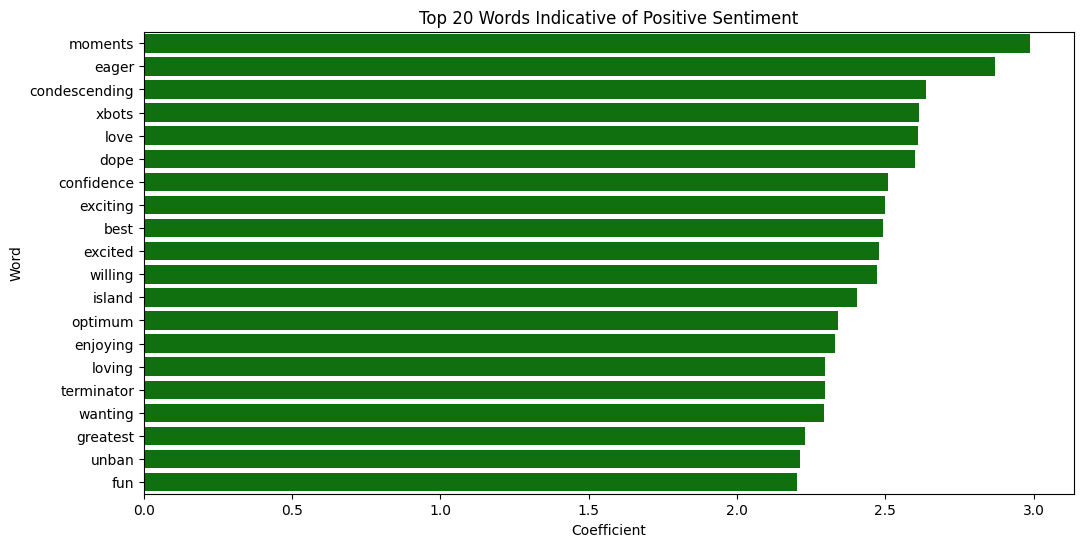

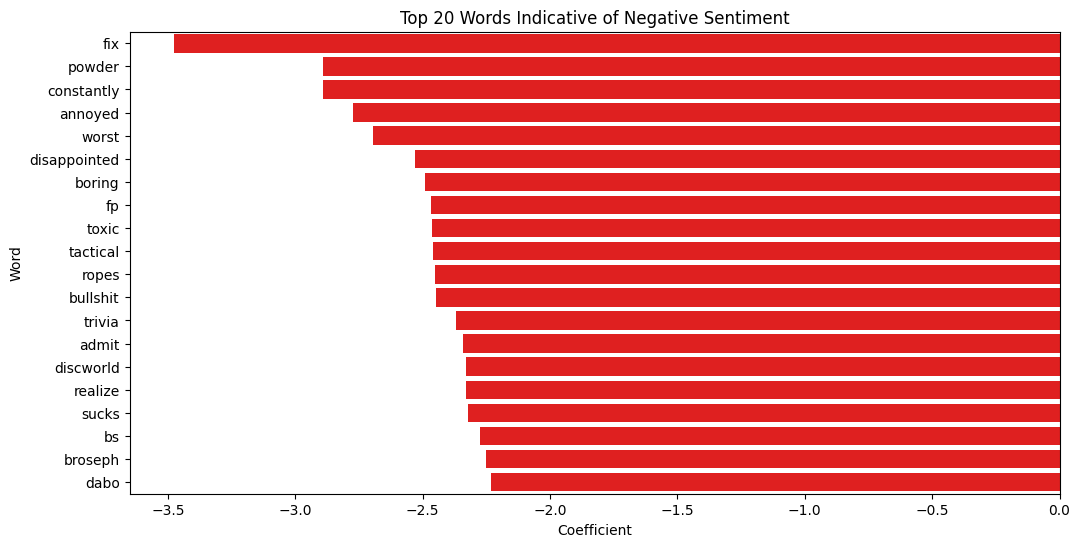

In [35]:
import pandas as pd
import numpy as np

# 1. Get feature names from TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# 2. Get SVM coefficients
# LinearSVC has shape (n_classes, n_features) for multi-class
# For binary, it's just one array
coefficients = svm_model.coef_[0]

# 3. Create a DataFrame of features and their coefficients
coef_df = pd.DataFrame({
    'word': feature_names,
    'coefficient': coefficients
})

# 4. Top 20 words for Positive sentiment (highest coefficients)
top_positive = coef_df.sort_values(by='coefficient', ascending=False).head(20)

# 5. Top 20 words for Negative sentiment (lowest coefficients)
top_negative = coef_df.sort_values(by='coefficient', ascending=True).head(20)

print("Top 20 words for Positive sentiment:")
print(top_positive)

print("\nTop 20 words for Negative sentiment:")
print(top_negative)

# Optional: visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='coefficient', y='word', data=top_positive, color='green')
plt.title("Top 20 Words Indicative of Positive Sentiment")
plt.xlabel("Coefficient")
plt.ylabel("Word")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='coefficient', y='word', data=top_negative, color='red')
plt.title("Top 20 Words Indicative of Negative Sentiment")
plt.xlabel("Coefficient")
plt.ylabel("Word")
plt.show()


In [37]:
import joblib

# Save SVM model with compression
joblib.dump(svm_model, "models/linear_svm_sentiment_model.pkl", compress=("gzip", 3))

# Save TF-IDF vectorizer with compression
joblib.dump(vectorizer, "models/tfidf_vectorizer.pkl", compress=("gzip", 3))



['models/tfidf_vectorizer.pkl']

In [ ]:
len(vectorizer.vocabulary_)


20458

In [ ]:
print("Vocabulary size:", len(vectorizer.vocabulary_))


Vocabulary size: 20458
